<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Maestria-IMCA/blob/main/Clase7_Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
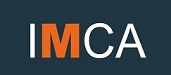


---


# CLASE 7: INTERPOLACION POLINOMIAL

### **1. Interpolación polinomial de Newton**

In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def interpolacion_Newton(x, y):
  n=len(x)-1
  F=np.zeros([n+1,n+1]) ## Iniciamos con una matriz de ceros.
  F[:,0]=y ## Asignamos la primera columna
  for i in range(1,n+1): ## Asigna la columna i.
    for j in range(i, n+1):
      F[j][i]=(F[j][i-1]-F[j-1][i-1])/(x[j]-x[j-i]) ## Calcula las diferencias divididas
  return [F[i][i] for i in range(n+1)]

In [150]:
x=[1, 1.3, 1.6, 1.9, 2.2]
y=[0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
coef=interpolacion_Newton(x, y)
print("Coeficiente del polinomio de Newton: ")
print(coef)

Coeficiente del polinomio de Newton: 
[0.7651977, -0.4837056666666664, -0.10873388888888935, 0.06587839506172834, 0.0018251028806604353]


In [149]:
#evaluacion de un punto en el polinomio de interpolacion de Newton
# Ingreso de la matriz de coef de interpolacion aux
# ingreso matriz de coordenadas x
# punto a ser evaluado x
def polinoNew(aux,cord,x):
  cad1=''
  cad2=''
  longi=len(aux)
  for i in range(longi):
    if(i==0):
      cad1=cad1+str(aux[i])
    else:
      cad2=cad2+'*(x-'+str(cord[i-1])+')'
      cad1=cad1+str(aux[i])+cad2

    if(i!=longi-1):
      cad1=cad1+'+'

  return eval(cad1)
# ejemplo 1:
# evaluar el pto 2
# Se ingresara la matriz de coef del polinomio de Newton coef
# Se matriz de coordenadas x
print("Evaluacion de Polinomio de Newton en el pto 2 :",polinoNew(coef,x,1.3))

Evaluacion de Polinomio de Newton en el pto 2 : 0.620086


In [ ]:
def eval_newton(coef, x, a):
  sum=coef[0]
  prod=1
  for i in range(1, len(x)):
    prod*=(a-x[i-1])
    sum+=coef[i]*prod
  return sum

In [ ]:
xx=np.linspace(0, 3, 100)
yy=eval_newton(coef, x, xx)

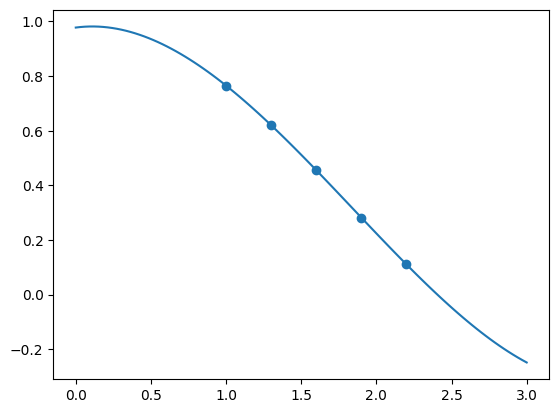

In [ ]:
plt.scatter(x, y)
plt.plot(xx, yy)
plt.show()

### **2. Interpolación de Lagrange**

In [123]:
import numpy as np
import matplotlib.pyplot as plt
def Lagrange(x, y, a):
  sum=0
  for i in range(len(x)): ## Agrega el sumando i-ésimo.
    prod=1
    for j in range(len(x)): ## Evalúa el j-ésimo factor del i-ésimos polinomio base.
      if j!=i:
        prod*=(a-x[j])/(x[i]-x[j])
    sum+=y[i]*prod
  return sum

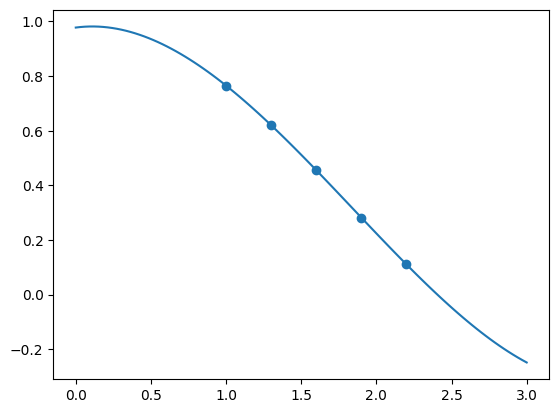

In [122]:
# ejemplo 1
import numpy as np
import matplotlib.pyplot as plt
x=[1, 1.3, 1.6, 1.9, 2.2]
y=[0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
plt.scatter(x,y)
xx=np.linspace(0, 3, 100)
plt.plot(xx, Lagrange(x, y, xx))
plt.show()

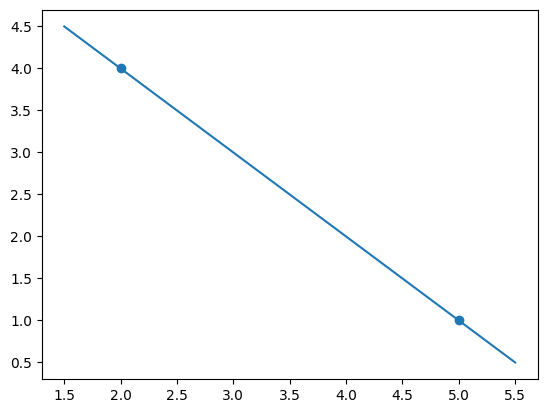

In [127]:
# ejemplo 2
import numpy as np
import matplotlib.pyplot as plt
x=[2,5]
y=[4,1]
plt.scatter(x,y)
xx=np.linspace(1.5, 5.5, 100)
plt.plot(xx, Lagrange(x, y, xx))
plt.show()

In [128]:
from scipy.interpolate import lagrange
x=[1, 1.3, 1.6, 1.9, 2.2]
y=[0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
poly = lagrange(x, y)
poly

poly1d([ 0.0018251 ,  0.0552928 , -0.3430466 ,  0.07339135,  0.97773506])

In [ ]:
type(poly)

numpy.poly1d

In [ ]:
print(poly)

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


In [ ]:
import numpy as np
xx=np.linspace(0, 3, 100)
yy=poly(xx)

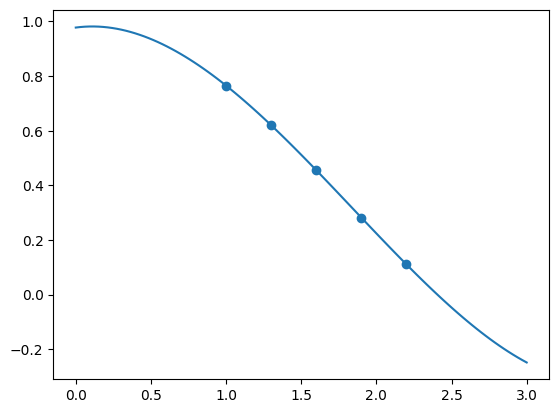

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xx, yy)
plt.scatter(x,y)
plt.show()

### **3.- SPLINE CUBICO DE FRONTERA LIBRE**

In [109]:
import numpy as np
# lista de coordenada x
# lista de coordenada y
def spline_cubico(x,y):
  n=len(x)-1
  a=y
  h=[x[j+1] - x[j] for j in range(n)]
  alfa=np.zeros(n+1)
  A=np.zeros([n+1,n+1])
  A[0,0]=1
  A[n,n]=1
  for i in range(1,n):
    A[i,i]=2*(h[i-1]+h[i])
    A[i,i-1]=h[i-1]
    A[i,i+1]=h[i]
    alfa[i]=3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]
  print("Matriz A: \n")
  print(A)
  print("Matriz alfa:")
  print(alfa)
  c=np.linalg.solve(A,alfa)
  d=np.zeros(n)
  b=np.zeros(n)
  for i in range(n):
    d[i]=(c[i+1]-c[i])/(3*h[i])
    b[i]=(a[i+1]-a[i])/h[i]-(c[i+1]+2*c[i])*h[i]/3
  coef=np.array([a[:-1], b, c[:-1], d])
  return coef

In [110]:
#ingreso de los puntos a interpolar
x=[0,1,2,3]
y=[np.exp(0), np.exp(1), np.exp(2), np.exp(3)]
#funcion splin cubico con frontera libre
coef=spline_cubico(x,y)
coef

Matriz A: 

[[1. 0. 0. 0.]
 [1. 4. 1. 0.]
 [0. 1. 4. 1.]
 [0. 0. 0. 1.]]
Matriz alfa:
[ 0.          8.85747733 24.07711966  0.        ]


array([[ 1.        ,  2.71828183,  7.3890561 ],
       [ 1.46599761,  2.22285026,  8.80976965],
       [ 0.        ,  0.75685264,  5.83006675],
       [ 0.25228421,  1.69107137, -1.94335558]])

In [111]:
#evaluacion de un punto en el polinomio de interpolacion
# Ingreso de la matriz de coef de interpolacion aux
# ingreso del comienzo del intervalo de interpolacion donde se evaluara el pto [p,p+1], en este caso es p
# punto a ser evaluado p
def polinoInter(aux,p,x):
  cad1=''
  longi=len(aux)
  for i in range(longi):
    cad1=cad1+str(aux[i])+'*(x-'+str(p)+')**'+str(i)
    if(i!=longi-1):
      cad1=cad1+'+'
    else:
      cad1=''+cad1
  return eval(cad1)

# ejemplo 1:
# evaluar el pto 2
# Se ingresara la matriz de coef del segundo intervalo coef[:,1]
# Se ingresara el punto inicial del intervalo a ser evaluado [p,p+1], en este caso p
aux=np.array(coef[:,1])
p=1
pto=2
polinoInter(aux,1,pto)


7.38905609893065

In [112]:
#calculo de los polinomios de interpolacion
poli_0=np.poly1d(np.array(coef[:,0].ravel().tolist()[::-1]))
poli_1=np.poly1d(np.array(coef[:,1].ravel().tolist()[::-1]))
poli_2=np.poly1d(np.array(coef[:,2].ravel().tolist()[::-1]))
print(poli_0)
print(poli_1)
print(poli_2)
print("Tiene una faalla en los factores deberia ser (x-p) en cada [p,p+1] de cada polinomio ")

        3
0.2523 x + 1.466 x + 1
       3          2
1.691 x + 0.7569 x + 2.223 x + 2.718
        3        2
-1.943 x + 5.83 x + 8.81 x + 7.389
Tiene una faalla en los factores deberia ser (x-p) en cada [p,p+1] de cada polinomio 


In [113]:
def eval_spline(coef, x, punto):
  n=len(x)-1
  i=0
  while i<n:
    if punto<=x[i+1]:
      break
    else:
      i+=1
  suma=0
  for j in range(4):
    suma+=coef[j][i]*(punto-x[i])**j
  return suma

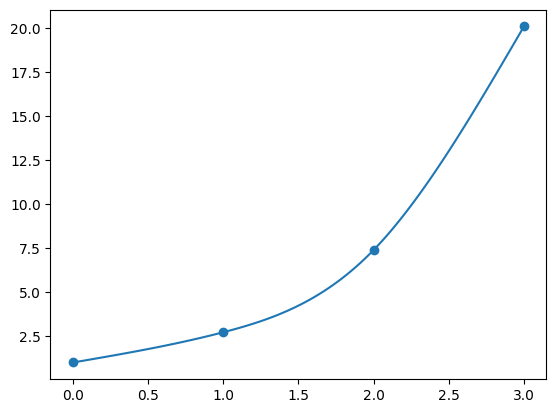

In [114]:
xx=np.linspace(0, 3, 100)
yy=[eval_spline(coef, x, punto) for punto in xx]
import matplotlib.pyplot as plt
plt.plot(xx,yy)
plt.scatter(x,y)
plt.show()

# 4.- SPLINE CUBICO DE FRONTERA CONDICIONADA

In [115]:
import numpy as np
# lista de coordenada x
# lista de coordenada y
# FPO derivada en el extremo del intervalo inicial
# FPN derivada en el extremo del intervado final
def spline_cubico_cond(x,y,FPO,FPN):
  n=len(x)-1
  a=y
  h=[x[j+1] - x[j] for j in range(n)]
  alfa=np.zeros(n+1)
  A=np.zeros([n+1,n+1])
  A[0,0]=1
  A[n,n]=1
  #llenado de la matrix A y alfaa
  for i in range(1,n):
    A[i,i]=2*(h[i-1]+h[i])
    A[i,i-1]=h[i-1]
    A[i,i+1]=h[i]
    alfa[i]=3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]

  #condiciones de frontera condicionada
  A[0,0]=2*A[1,0]
  A[0,1]=A[1,0]
  A[n,n]=2*A[n-1,n]
  A[n,n-1]=A[n-1,n]
  alfa[0]=3*(a[1]-a[0])/h[0]-3*FPO
  alfa[n]=3*FPN-3*(a[n]-a[n-1])/h[n-1]

  print("Matriz A:")
  print(A)
  print("Matriz alfa: ")
  print(alfa)
  #resolucion del sistema lineal
  c=np.linalg.solve(A,alfa)
  d=np.zeros(n)
  b=np.zeros(n)
  #calculo de coeficientes de los polinomios de interpolacion
  for i in range(n):
    d[i]=(c[i+1]-c[i])/(3*h[i])
    b[i]=(a[i+1]-a[i])/h[i]-(c[i+1]+2*c[i])*h[i]/3
  coef=np.array([a[:-1], b, c[:-1], d])
  return coef

In [116]:
#ingreso de los puntos a interpolar
x=[0,1,2,3]
y=[np.exp(0), np.exp(1), np.exp(2), np.exp(3)]
#funcion splin cubico con frontera libre
coef=spline_cubico_cond(x,y,1,np.exp(3))
coef

Matriz A:
[[2. 1. 0. 0.]
 [1. 4. 1. 0.]
 [0. 1. 4. 1.]
 [0. 0. 1. 2.]]
Matriz alfa: 
[ 2.15484549  8.85747733 24.07711966 22.1671683 ]


array([[1.        , 2.71828183, 7.3890561 ],
       [1.        , 2.71016299, 7.32651634],
       [0.4446825 , 1.26548049, 3.35087286],
       [0.27359933, 0.69513079, 2.01909162]])

In [117]:
#calculo de los polinomios de interpolacion
poli_0=np.poly1d(np.array(coef[:,0].ravel().tolist()[::-1]))
poli_1=np.poly1d(np.array(coef[:,1].ravel().tolist()[::-1]))
poli_2=np.poly1d(np.array(coef[:,2].ravel().tolist()[::-1]))
print(poli_0)
print(poli_1)
print(poli_2)
print("Tiene una faalla en los factores deberia ser (x-p) en cada [p,p+1] de cada polinomio ")

   3     2
1 x + 1 x + 0.4447 x + 0.2736
       3        2
2.718 x + 2.71 x + 1.265 x + 0.6951
       3         2
7.389 x + 7.327 x + 3.351 x + 2.019


In [118]:
#evaluacion de un punto en el polinomio de interpolacion
# Ingreso de la matriz de coef de interpolacion aux
# ingreso del comienzo del intervalo de interpolacion donde se evaluara el pto [p,p+1], en este caso es p
# punto a ser evaluado p
def polinoInter(aux,p,x):
  cad1=''
  longi=len(aux)
  for i in range(longi):
    cad1=cad1+str(aux[i])+'*(x-'+str(p)+')**'+str(i)
    if(i!=longi-1):
      cad1=cad1+'+'
    else:
      cad1=''+cad1
  return eval(cad1)

# ejemplo 1:
# evaluar el pto 2
# Se ingresara la matriz de coef del segundo intervalo coef[:,1]
# Se ingresara el punto inicial del intervalo a ser evaluado [p,p+1], en este caso p
aux=np.array(coef[:,1])
p=1
pto=2
polinoInter(aux,1,pto)


7.38905609893065

In [119]:
def eval_spline(coef, x, punto):
  n=len(x)-1
  i=0
  while i<n:
    if punto<=x[i+1]:
      break
    else:
      i+=1
  suma=0
  for j in range(4):
    suma+=coef[j][i]*(punto-x[i])**j
  return suma

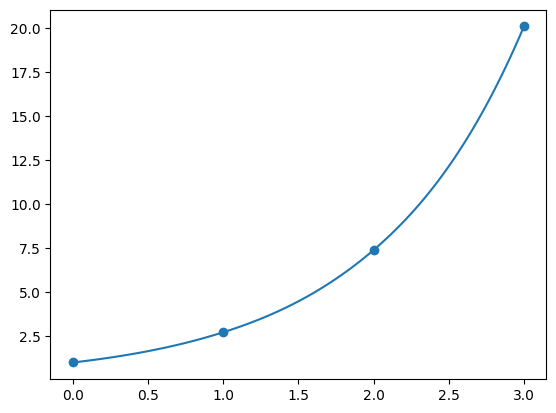

In [120]:
xx=np.linspace(0, 3, 100)
yy=[eval_spline(coef, x, punto) for punto in xx]
import matplotlib.pyplot as plt
plt.plot(xx,yy)
plt.scatter(x,y)
plt.show()

### **3.1 Ejemplo**

In [ ]:
import pandas as pd
datos=pd.read_excel('datos_spline.xlsx')
x_ave=datos['x']
y_ave=datos['y']
coef_ave=spline_cubico(x_ave,y_ave)

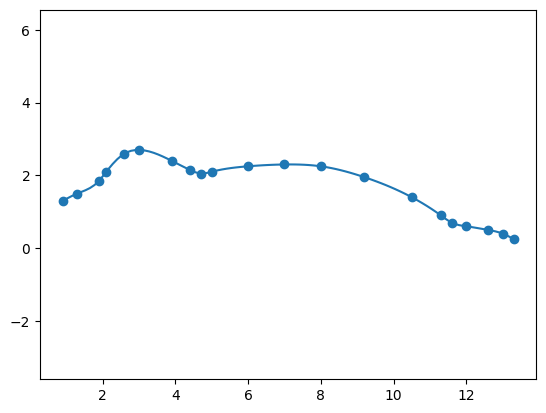

In [ ]:
xx_ave=np.linspace(x_ave.min(), x_ave.max(), 100)
yy_ave=[eval_spline(coef_ave, x_ave, punto) for punto in xx_ave]
plt.plot(xx_ave, yy_ave)
plt.scatter(x_ave, y_ave)
plt.axis('equal')
plt.show()

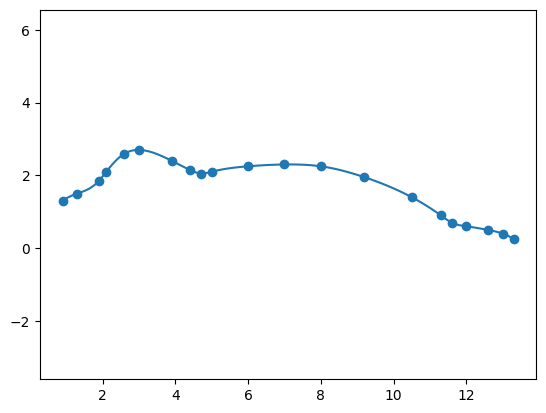

In [ ]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x_ave, y_ave)
xx_ave=np.linspace(x_ave.min(), x_ave.max(), 100)
plt.plot(xx_ave, cs(xx_ave))
plt.scatter(x_ave, y_ave)
plt.axis('equal')
plt.show()